In [1]:
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, dendrogram

from pyclustertend import hopkins

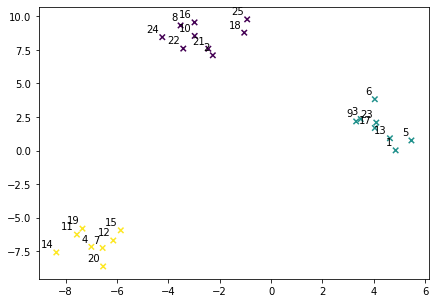

In [3]:
data, clusters = make_blobs(n_samples=25, centers=3, random_state=42)

plt.figure(figsize=(7, 5))
plt.scatter(data[:, 0], data[:, 1], marker='x', c=clusters, s=30)

for i, (point, cluster) in enumerate(zip(data, clusters)):
    plt.annotate(i + 1, xy=(point[0], point[1]), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

[]

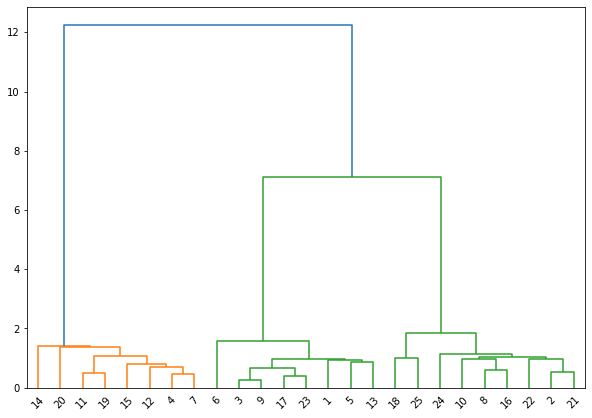

In [4]:
linked = linkage(data, 'single')

labels = list(range(1, 26))

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labels,
            distance_sort='descending',
            show_leaf_counts=True)

plt.plot()

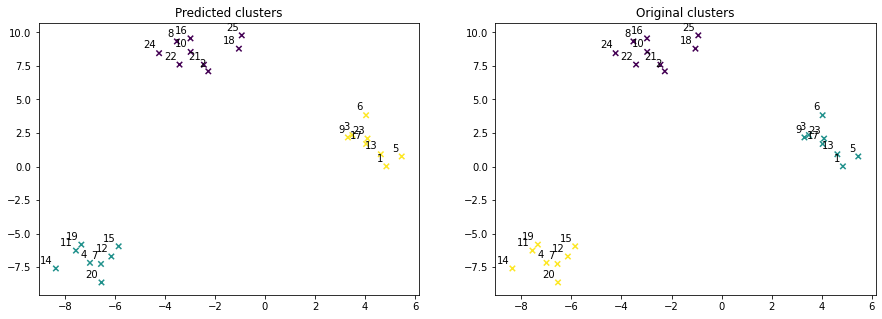

In [18]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
predicted_clusters = cluster.fit_predict(data)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Predicted clusters')
plt.scatter(data[:, 0], data[:, 1], marker='x', c=predicted_clusters, s=30)

for i, (point, cluster) in enumerate(zip(data, predicted_clusters)):
    plt.annotate(i + 1, xy=(point[0], point[1]), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

plt.subplot(122)
plt.title('Original clusters')
plt.scatter(data[:, 0], data[:, 1], marker='x', c=clusters, s=30)

for i, (point, cluster) in enumerate(zip(data, clusters)):
    plt.annotate(i + 1, xy=(point[0], point[1]), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

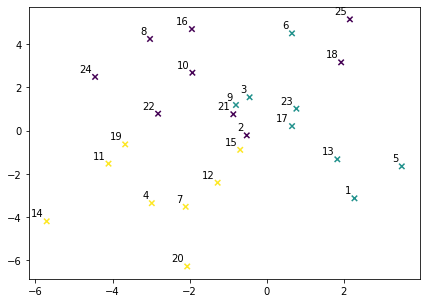

In [5]:
data, clusters = make_blobs(n_samples=25, centers=3, random_state=42, cluster_std=2.0, center_box=(-4.0, 4.0))
plt.figure(figsize=(7, 5))
plt.scatter(data[:, 0], data[:, 1], marker='x', c=clusters, s=30)

for i, (point, cluster) in enumerate(zip(data, clusters)):
    plt.annotate(i + 1, xy=(point[0], point[1]), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

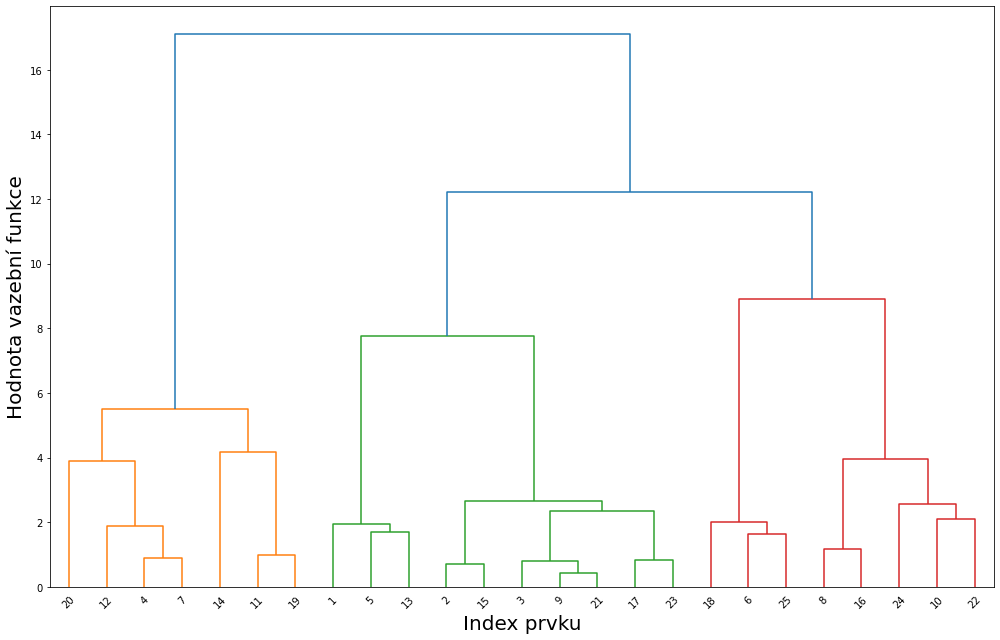

In [6]:
linked = linkage(data, 'ward')

labels = list(range(1, 26))

plt.figure(figsize=(14, 9))
dendrogram(linked,
            orientation='top',
            labels=labels,
            distance_sort='descending',
            show_leaf_counts=True)

plt.rc('axes', labelsize=20)
plt.xlabel('Index prvku')
plt.ylabel('Hodnota vazební funkce')
plt.grid(b=False)
plt.tight_layout()
plt.plot()
plt.savefig('dendrogram_cz.pdf')

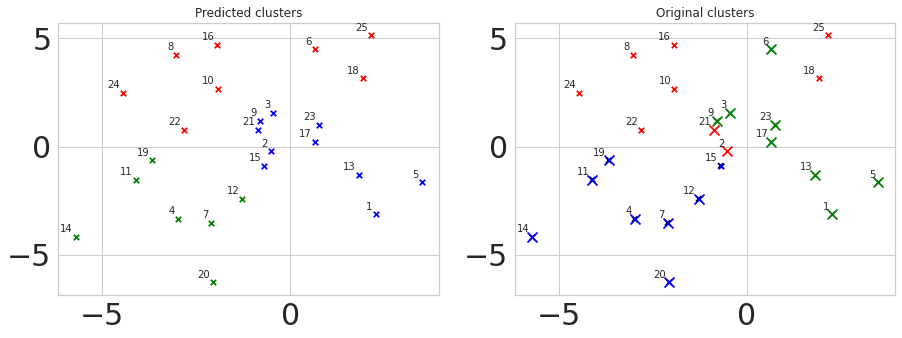

In [126]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
predicted_clusters = cluster.fit_predict(data)

colors = ['red', 'green', 'blue']

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title('Predicted clusters')

for i, (point, cluster) in enumerate(zip(data, predicted_clusters)):
    plt.scatter(point[0], point[1], marker='x', c=colors[cluster], s=30)
    plt.annotate(i + 1, xy=(point[0], point[1]), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

plt.subplot(122)
plt.title('Original clusters')
plt.scatter(data[:, 0], data[:, 1], marker='x', c=clusters, s=30)

for i, (point, cluster) in enumerate(zip(data, clusters)):
    if cluster == predicted_clusters[i]:
        plt.scatter(point[0], point[1], marker='x', c=colors[cluster], s=30)
    else:
        plt.scatter(point[0], point[1], marker='x', c=colors[cluster], s=100)
    plt.annotate(i + 1, xy=(point[0], point[1]), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [33]:
clusterable, _ = make_blobs(n_samples=25, centers=3, random_state=42)
somewhat_clusterable, _ = make_blobs(n_samples=25, centers=3, random_state=42, cluster_std=2.0, center_box=(-4.0, 4.0))
unclusterable, _ = make_blobs(n_samples=25, centers=3, random_state=42, cluster_std=4.0, center_box=(-4.0, 4.0))

print(hopkins(clusterable, 25))
print(hopkins(somewhat_clusterable, 25))
print(hopkins(unclusterable, 25))

0.1745475576961789
0.5960815391307924
0.5684584044921629


In [36]:
bl, _ = make_blobs(n_samples=25, centers=3, random_state=42, cluster_std=0.5)

hopkins(bl, 25)

0.08686423646881002

In [63]:
import plotly.graph_objects as go
import numpy as np

In [71]:
pretty_blue = 'rgb(49,130,189)'
label = 'Skóre'
x_data = np.arange(0.0, 8.1, 0.4)
y_data = []
for std in x_data:
    blobs, _ = make_blobs(n_samples=25, centers=3, random_state=42, cluster_std=std)
    hs = hopkins(blobs, 25)
    y_data.append(hs)
y_data = np.array(y_data)

fig = go.Figure()

fig.add_trace(go.Scatter(x=x_data, y=y_data, mode='lines',
    name=label,
    line=dict(color=pretty_blue, width=4),
    connectgaps=True,
))

# endpoints
fig.add_trace(go.Scatter(
    x=[x_data[0], x_data[-1]],
    y=[y_data[0], y_data[-1]],
    mode='markers',
    marker=dict(color=pretty_blue, size=12)
))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)
annotations = []

# labeling the left_side of the plot
annotations.append(dict(xref='paper', x=0.05, y=y_data[0],
                              xanchor='right', yanchor='middle',
                              text=label + f' {y_data[0] * 100:.0f}%',
                              font=dict(family='Arial',
                                        size=16),
                              showarrow=False))
# labeling the right_side of the plot
annotations.append(dict(xref='paper', x=0.95, y=y_data[-1],
                              xanchor='left', yanchor='middle',
                              text=f'{y_data[-1] * 100:.0f}%',
                              font=dict(family='Arial',
                                        size=16),
                              showarrow=False))

# Title
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text="Závislost Hopkinsova testu na ICV",
                              font=dict(family='Arial',
                                        size=24,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

annotations.append(dict(xref='paper', yref='paper', x=0.65, y=0.45,
                              xanchor='left', yanchor='bottom',
                              text="Hranice unimodularity dat",
                              font=dict(family='Arial',
                                        size=11,
                                        color='red'),
                              showarrow=False))

fig.add_shape(type="line",
    x0=-0.5, y0=0.25, x1=8.5, y1=0.25,
    line=dict(
        color="red",
        width=1,
        dash="dash"
    )
)

first = 0
for i, hs in enumerate(y_data):
    if hs > 0.25:
        first = i - 1
        break

fig.add_vrect(
    x0=x_data[first], x1=x_data[first + 1],
    fillcolor="LightSalmon", opacity=0.5,
    layer="below", line_width=0,
)

fig.update_layout(annotations=annotations)

fig.update_layout(xaxis_title="Inter cluster variance")
fig.show()

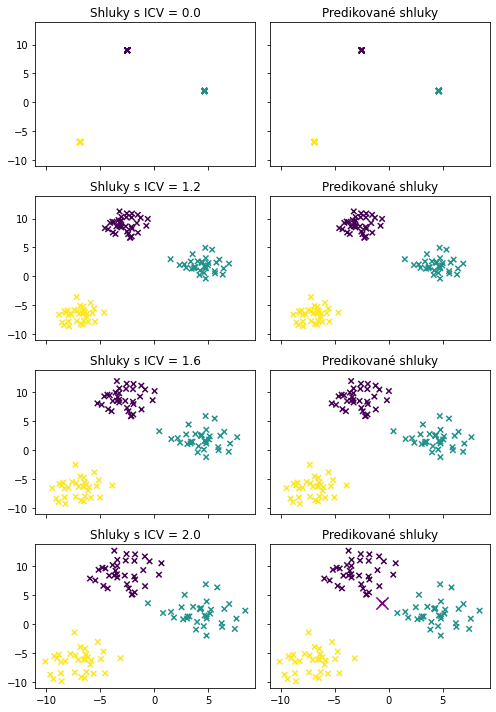

In [61]:
test_stds = [0.0, 1.2, 1.6, 2.0]

fig, axes = plt.subplots(4, 2, sharex=True, sharey=True, figsize=(7, 10))
for i, std in enumerate(test_stds):
    data, clusters = make_blobs(n_samples=100, centers=3, random_state=42, cluster_std=std)
    axes[i][0].scatter(data[:, 0], data[:, 1], marker='x', c=clusters, s=30)
    axes[i][0].set_title(f'Shluky s ICV = {std}')
    
    cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
    predicted_clusters = cluster.fit_predict(data)
    predicted_clusters = [1 if c == 2 else 2 if c == 1 else 0 for c in predicted_clusters]
    axes[i][1].scatter(data[:, 0], data[:, 1], marker='x', c=predicted_clusters, s=30)
    axes[i][1].set_title(f'Predikované shluky')
    
    for j, (gold, pred) in enumerate(zip(clusters, predicted_clusters)):
        if gold != pred:
            axes[i][1].scatter(data[j][0], data[j][1], marker='x', c='purple', s=150)

plt.tight_layout()
plt.savefig('misclassification_hopkins_too_large_cz.pdf')
plt.show()

In [181]:
from yellowbrick.cluster import KElbowVisualizer, KElbow, 

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

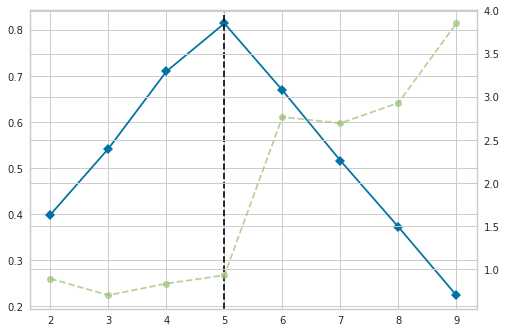

In [227]:
data, clusters = make_blobs(n_samples=1000, n_features=12, centers=5, random_state=42)
model = KMeans()
kelbow = KElbowVisualizer(model, k=(2,10), metric='silhouette')
kelbow.fit(data)

In [220]:
from sklearn.cluster import AffinityPropagation
data, clusters = make_blobs(n_samples=3000, n_features=10000, centers=12, random_state=42, cluster_std=1.5)
clustering = AffinityPropagation(random_state=42, damping=0.9).fit(data)

len(clustering.cluster_centers_)

12

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


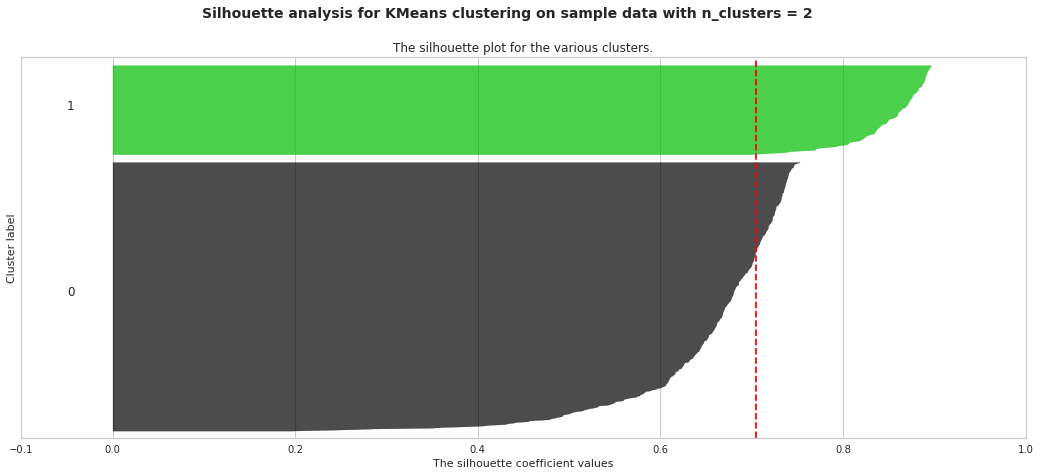

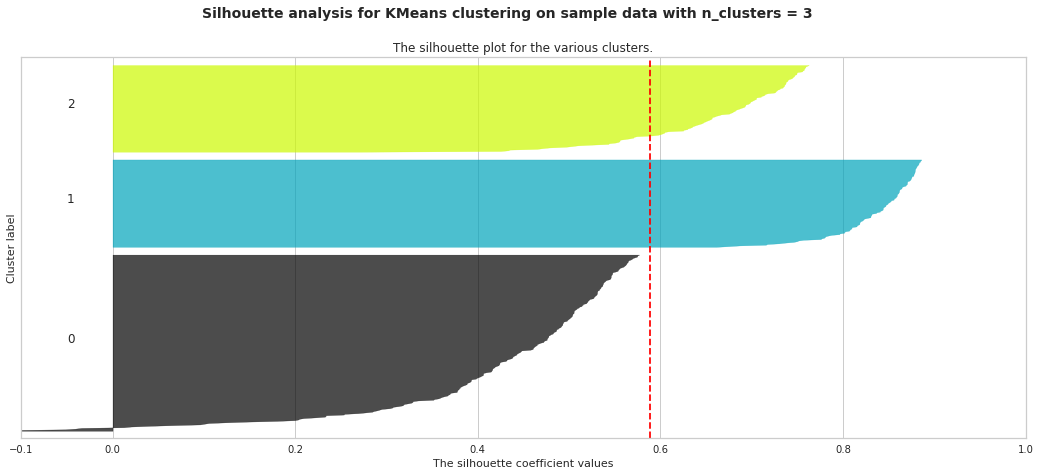

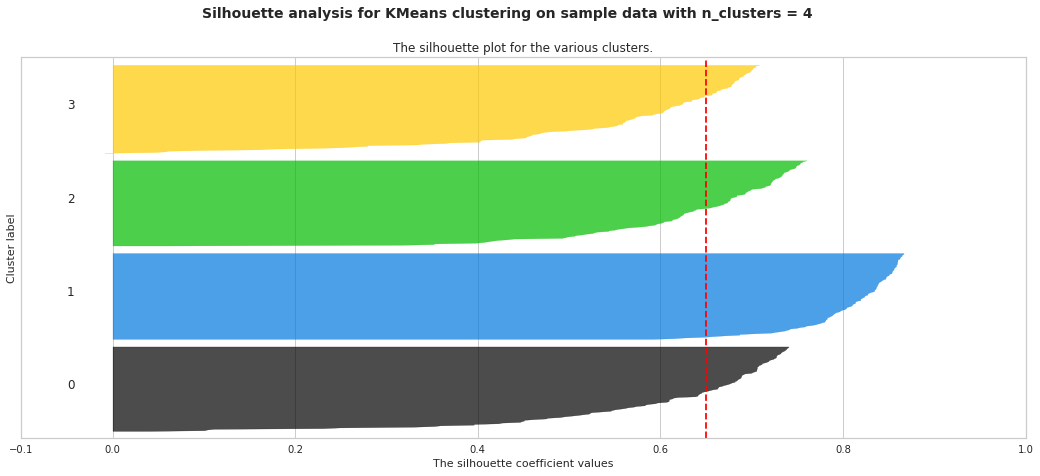

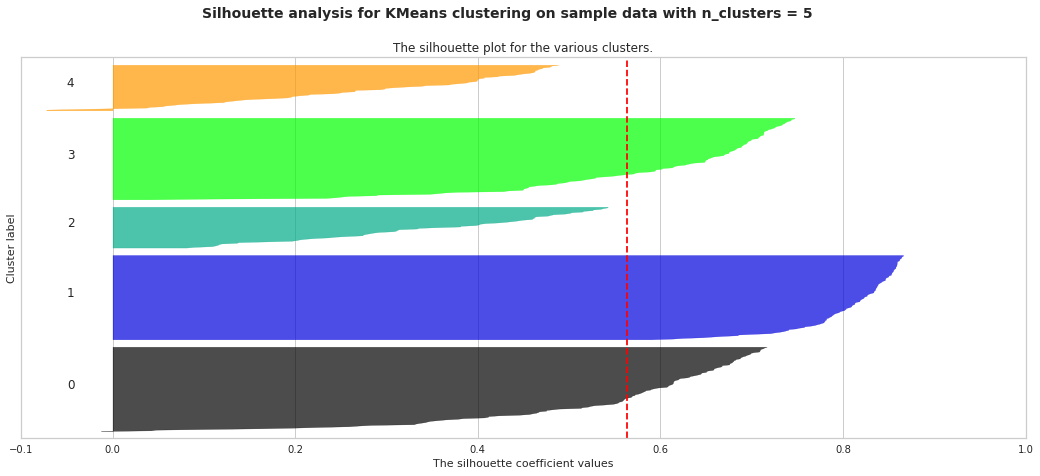

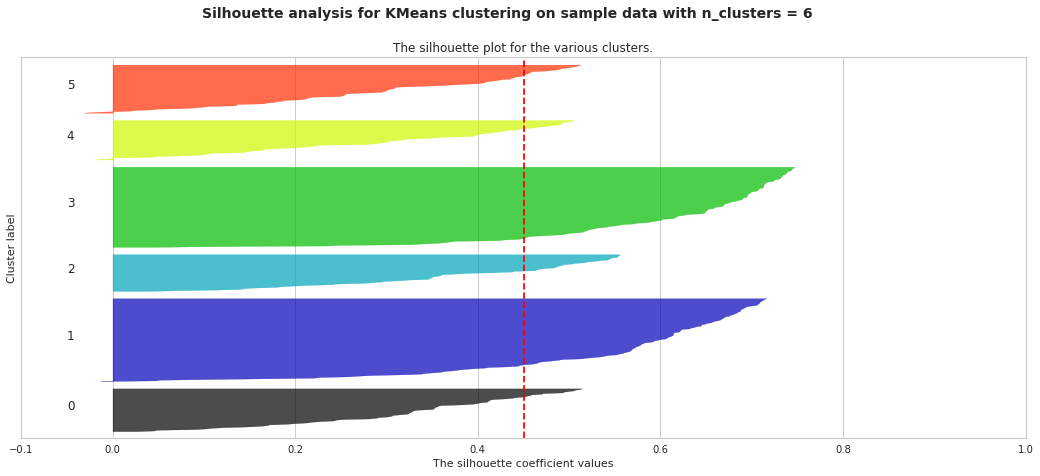

In [226]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = vectors['word2vec_25_100'][np.random.choice(vectors['word2vec_25_100'].shape[0], 10000, replace=False), :]

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [2]:
from unidip import UniDip
import unidip.dip as dip
import numpy as np

In [332]:
from sklearn.decomposition import PCA
data, clusters = make_blobs(n_samples=25, n_features=2, centers=1, random_state=42)

pca = PCA(n_components=1, random_state=42)
pca_reduced = pca.fit_transform(data).flatten()

print(hopkins(data, data.shape[0]))
print(dip.diptst(pca_reduced)[1])

0.5589686013269142
0.6103896103896104


In [363]:
colors = ['rgb(49,130,189)', 'rgb(205,92,92)']
label = ['PCA-Dip', 'Hopkins']
x_data = np.linspace(10, 10000, 18, dtype=np.int16)
hs_data, d_data = [], []
for n in x_data:
    blobs, _ = make_blobs(n_samples=n, centers=1, random_state=42)
    pca_reduced = pca.fit_transform(blobs).flatten()
    hs = hopkins(blobs, n)
    d = dip.diptst(pca_reduced)[1]
    hs_data.append(hs)
    d_data.append(d)
y_data = np.array([d_data, hs_data])

fig = go.Figure()

for i in range(2):
    fig.add_trace(go.Scatter(x=x_data, y=y_data[i], mode='lines',
        name=label[i],
        line=dict(color=colors[i], width=4),
        connectgaps=True,
    ))

    # endpoints
    fig.add_trace(go.Scatter(
        x=[x_data[0], x_data[-1]],
        y=[y_data[i][0], y_data[i][-1]],
        mode='markers',
        marker=dict(color=colors[i], size=12)
    ))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)
annotations = []

for y_trace, lab in zip(y_data, label):
    # labeling the left_side of the plot
    annotations.append(dict(xref='paper', x=0.05, y=y_trace[0],
                                  xanchor='right', yanchor='middle',
                                  text=lab + f' {y_trace[0] * 100:.0f}%',
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))
    # labeling the right_side of the plot
    annotations.append(dict(xref='paper', x=0.95, y=y_trace[-1],
                                  xanchor='left', yanchor='middle',
                                  text=f'{y_trace[-1] * 100:.0f}%',
                                  font=dict(family='Arial',
                                            size=16),
                                  showarrow=False))

# Title
annotations.append(dict(xref='paper', yref='paper', x=-0.1, y=1.1,
                              xanchor='left', yanchor='bottom',
                              text="Hopkins vs PCA-Dip pro unimodální 2D data",
                              font=dict(family='Arial',
                                        size=20,
                                        color='rgb(37,37,37)'),
                              showarrow=False))

fig.update_layout(annotations=annotations)

fig.update_layout(xaxis_title="Počet vzorků")
fig.show()

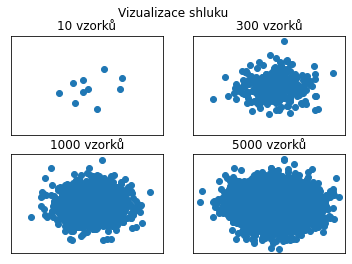

In [62]:
data, clusters = make_blobs(n_samples=10, n_features=2, centers=1, random_state=42)
data1, clusters = make_blobs(n_samples=300, n_features=2, centers=1, random_state=42)
data2, clusters = make_blobs(n_samples=1000, n_features=2, centers=1, random_state=42)
data3, clusters = make_blobs(n_samples=5000, n_features=2, centers=1, random_state=42)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

axes[0][0].scatter(data[:,0], data[:, 1])
axes[0][0].grid(False)
axes[0][0].set_title('10 vzorků')
axes[0][0].set_xticks([])
axes[0][0].set_yticks([])
axes[0][1].scatter(data1[:,0], data1[:, 1])
axes[0][1].grid(False)
axes[0][1].set_title('300 vzorků')
axes[0][1].set_xticks([])
axes[0][1].set_yticks([])
axes[1][0].scatter(data2[:,0], data2[:, 1])
axes[1][0].grid(False)
axes[1][0].set_title('1000 vzorků')
axes[1][0].set_xticks([])
axes[1][0].set_yticks([])
axes[1][1].scatter(data3[:,0], data3[:, 1])
axes[1][1].grid(False)
axes[1][1].set_xticks([])
axes[1][1].set_yticks([])
axes[1][1].set_title('5000 vzorků')

plt.suptitle('Vizualizace shluku')
plt.savefig('clusters_for_hopkins_dip_comp_cz.pdf')

In [370]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data, clusters = make_blobs(n_samples=1000, n_features=100000, centers=1, random_state=42)

scaler = StandardScaler()
svd = TruncatedSVD(n_components=100, random_state=42)
pca = PCA(n_components=1, random_state=42)
tsne = TSNE(n_components=1, random_state=42)
svd2 = TruncatedSVD(n_components=1, random_state=42)

svd_trans = svd.fit_transform(data)
svd_pca = pca.fit_transform(svd_trans).flatten()
svd_tsne = tsne.fit_transform(svd_trans).flatten()
svd_svd2 = svd2.fit_transform(svd_trans).flatten()

scaled = scaler.fit_transform(data)
sc_svd_trans = svd.fit_transform(scaled)
sc_svd_pca = pca.fit_transform(sc_svd_trans).flatten()
sc_svd_tsne = tsne.fit_transform(sc_svd_trans).flatten()
sc_svd_svd2 = svd2.fit_transform(sc_svd_trans).flatten()

print(dip.diptst(svd_pca)[1])
print(dip.diptst(svd_tsne)[1])
print(dip.diptst(svd_svd2)[1])
print(dip.diptst(sc_svd_pca)[1])
print(dip.diptst(sc_svd_tsne)[1])
print(dip.diptst(sc_svd_svd2)[1])

0.994005994005994
0.999000999000999
0.977022977022977
0.994005994005994
0.938061938061938
0.986013986013986


In [2]:
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
import unidip.dip as dip

def dip_dist(data):
    dist = np.msort(pdist(data))
    return dip.diptst(dist)[1]

#data, clusters = make_blobs(n_samples=1000, n_features=1000000, centers=5, random_state=42)
#dip_dist(data)

In [3]:
import os
import pickle
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from pyclustertend import hopkins
import numpy as np
pca = PCA(n_components=1, random_state=42)
np.random.seed(42)

def sample_rows(vec, n):
    return vec[np.random.choice(vec.shape[0], n, replace=False), :]

def pca_dip(data):
    pca_reduced = pca.fit_transform(data).flatten()
    print('Reduced dim using PCA')
    return dip.diptst(pca_reduced)[1]

def hopkins_sampled(data):
    return hopkins(data, 1000)

In [ ]:
from collections import  defaultdict
import pandas as pd
res = defaultdict(list)
svd = TruncatedSVD(n_components=100, random_state=42)
scaler = StandardScaler(with_mean=False)
exp_name = ''
for root, _, files in os.walk('saved_models/tf_w2v_d2v_fast_cz_nolemma_naz_anot_obor_uc_res_pos_2/'):
    for fn in files:
        if fn != 'vectors.pickle':
            continue
        exp_name = root.split('/')[1]
        with open(os.path.join(root, fn), 'rb') as handle:
            vectors = pickle.load(handle)
        for model_name, vector in vectors.items():
            print('Fitting for: ', exp_name, model_name)
            if 'tf-idf' in model_name:
                idxs = np.random.randint(0, vector.shape[0], 1000)
                vector = vector[idxs]
                print('Reducing using SVD...')
                vector = svd.fit_transform(vector)
            print('Meassuring PCA-Dip...')
            pca_metric = pca_dip(vector)
            hopkins_metric = hopkins_sampled(vector)
            print(f'PCA-Dip metric: {pca_metric:.4f}')
            print(f'Hopkins metric: {hopkins_metric:.4f}')
            res['exp_name'].append(exp_name)
            res['model_name'].append(model_name)
            res['PCA-Dip'].append(pca_metric)
            res['Hopkins'].append(hopkins_metric)

df = pd.DataFrame(res)
df.to_csv(os.path.join('saved_models', exp_name, 'dip_hopkins.csv'))
df.head()

Fitting for:  tf_w2v_d2v_fast_cz_nolemma_naz_anot_obor_uc_res_pos_2 tf-idf_(1,1)
Reducing using SVD...
Meassuring PCA-Dip...
Reduced dim using PCA
PCA-Dip metric: 1.0000
Hopkins metric: 0.1083
Fitting for:  tf_w2v_d2v_fast_cz_nolemma_naz_anot_obor_uc_res_pos_2 tf-idf_(1,2)
Reducing using SVD...
Meassuring PCA-Dip...
Reduced dim using PCA
PCA-Dip metric: 0.9890
Hopkins metric: 0.1243
Fitting for:  tf_w2v_d2v_fast_cz_nolemma_naz_anot_obor_uc_res_pos_2 tf-idf_(1,3)
Reducing using SVD...
Meassuring PCA-Dip...
Reduced dim using PCA
PCA-Dip metric: 0.9570
Hopkins metric: 0.1342
Fitting for:  tf_w2v_d2v_fast_cz_nolemma_naz_anot_obor_uc_res_pos_2 tf-idf_(1,4)
Reducing using SVD...
Meassuring PCA-Dip...
Reduced dim using PCA
PCA-Dip metric: 1.0000
Hopkins metric: 0.1274
Fitting for:  tf_w2v_d2v_fast_cz_nolemma_naz_anot_obor_uc_res_pos_2 tf-idf_(1,5)
Reducing using SVD...
Meassuring PCA-Dip...
Reduced dim using PCA
PCA-Dip metric: 0.9980
Hopkins metric: 0.1253
Fitting for:  tf_w2v_d2v_fast_cz_no

In [1]:
import pandas as pd
a = {'a': [1,2,3], 'b': [1,2,3]}
pd.DataFrame(a)

,a,b
0,1,1
1,2,2
2,3,3


In [21]:
def pca_dip_full(data):
    pca_reduced = pca.fit_transform(data).flatten()
    print('Reduced dim using PCA')
    return dip.diptst(pca_reduced)

pca_dip_full(vector)

Reduced dim using PCA


(0.01543771174849451, 0.000999000999000999, (1472, 7986))

In [56]:
%timeit -n 2 print(hopkins(vector, 10))

%timeit -n 2 print(hopkins(vector, 100))

%timeit -n 2 print(hopkins(vector, 1000))

%timeit -n 2 print(hopkins(vector, 5000))

0.08403243842082127
0.07899739460227387
0.07661434487091906
0.052656750850114876
0.08398127305564095
0.05723651859308654
0.06248623790624161
0.04076853641858543
0.06680664007870472
0.069018502330694
0.07177758742641614
0.07755972168298847
0.07616999104120413
0.0857624053594691
804 ms ± 3.31 ms per loop (mean ± std. dev. of 7 runs, 2 loops each)
0.07465879305078936
0.06971103430346112
0.0756031473215413
0.07431978930287135
0.08205270981870214
0.07216008926900404
0.08257799722978752
0.07567316308114239
0.07700914270287001
0.07606643189136808
0.07155490442380896
0.07338052704242211
0.07645003175508301
0.07563446516200771
1.46 s ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 2 loops each)
0.07412119944139439
0.07404057202399479
0.07351984511182459
0.07392802624562336
0.07200299789929192
0.0743167151838332
0.07519129696799505
0.07505291196086038
0.07355727803913878
0.07520206251204722
0.07730129865747161
0.07571575075923218
0.07338595261075583
0.07593590856513066
8.32 s ± 38 ms per loop (m

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


In [73]:
!pip install fasttext

     |████████████████████████████████| 68 kB 769 kB/s eta 0:00:011
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=4605498 sha256=4dd617ff908bc04cc20ccbb69f29dc9c94999a2ab09bd9816b1dadde772da36b
  Stored in directory: /home/fassty/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [75]:
sent = 'Na okně seděla kočka'
pd.DataFrame(index=sent.split(), columns=sent.split())

,Na,okně,seděla,kočka
Na,NaN,NaN,NaN,NaN
okně,NaN,NaN,NaN,NaN
seděla,NaN,NaN,NaN,NaN
kočka,NaN,NaN,NaN,NaN


In [76]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(42)

In [77]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

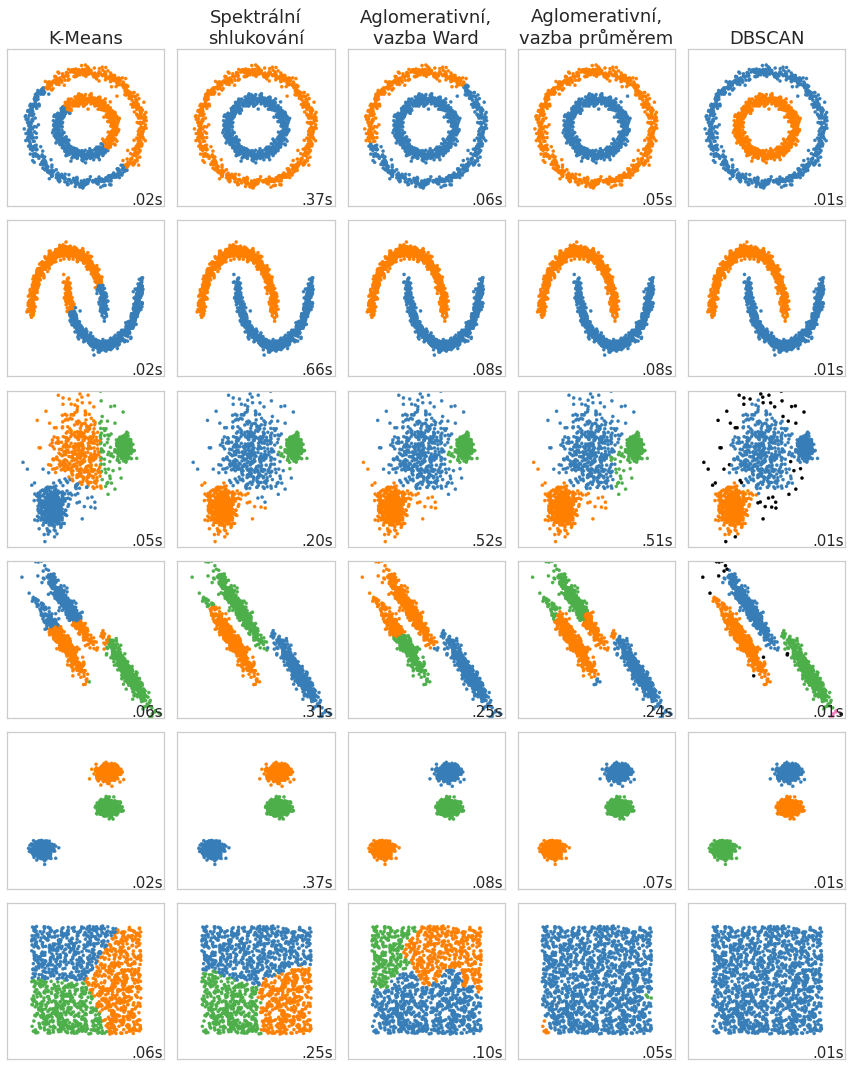

In [9]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(12, 15))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    two_means = cluster.KMeans(n_clusters=params['n_clusters'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", n_clusters=params['n_clusters'], connectivity=connectivity)
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])


    clustering_algorithms = (
        ('K-Means', two_means),
        ('Spektrální\nshlukování', spectral),
        ('Aglomerativní,\nvazba Ward', ward),
        ('Aglomerativní,\nvazba průměrem', average_linkage),
        ('DBSCAN', dbscan),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.tight_layout()
plt.savefig('clustering_comparison_cz.png')
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


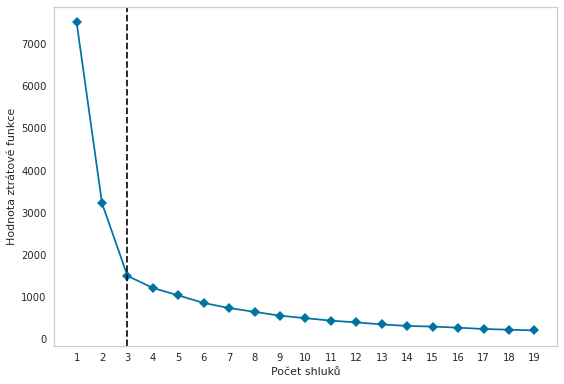

In [7]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
blobs, _ = make_blobs(n_samples=100, centers=3, cluster_std=3.0, random_state=42)
model = KMeans()
fig, ax = plt.subplots(1, 1)
visualizer = KElbowVisualizer(model, k=(1, 20), timings=False)
ax.set_xticks(list(range(20)))
ax.set_xlabel('Počet shluků')
ax.set_ylabel('Hodnota ztrátové funkce')
ax.grid(b=False, axis='both')
visualizer.fit(blobs)

plt.tight_layout()
plt.savefig('elbow_cz.pdf')